<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/2_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 2022 유망 업종 데이터 전처리

* 


In [1]:
# 라이브러리 로드하기 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [5]:
font_family = get_font_family()

In [6]:
# 그래프 스타일,폰트,마이너스폰트 설정
plt.style.use("seaborn")
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [7]:
# 1.수집 결과 csv 파일읽기
# 종목코드는 문자형태로 불러오기
file_name = "/content/drive/MyDrive/Colab Notebooks/2022-09-20.csv"
raw_data = pd.read_csv(file_name, dtype={"종목코드":np.object})
raw_data.shape

(198, 51)

In [8]:
raw_data.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2021.12),PBRlBPS (2021.12),PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09)
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,0.41%,NaN,NaN,NaN,NaN,NaN,NaN
3,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,1.30%,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# column 확인
raw_data.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '업종명', '조회일자', '종목명_전처리', '종목코드', '매출액', '영업이익', '당기순이익', '영업이익률',
       '순이익률', 'ROE(지배주주)', '부채비율', '당좌비율', '유보율', 'EPS(원)', 'PER(배)',
       'BPS(원)', 'PBR(배)', '주당배당금(원)', '시가배당률(%)', '배당성향(%)', '시가총액', '시가총액순위',
       '상장주식수', '액면가l매매단위', '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)',
       '투자의견l목표주가', '52주최고l최저', 'PERlEPS(2022.06)', '추정PERlEPS',
       'PBRlBPS (2022.06)', '배당수익률', '동일업종 PER', '동일업종 등락률', '배당수익률l2021.12',
       'PERlEPS(2021.12)', 'PBRlBPS (2021.12)', 'PERlEPS(2022.03)',
       'PBRlBPS (2022.03)', 'PERlEPS(2021.09)', 'PBRlBPS (2021.09)'],
      dtype='object')

##### 결측치 전처리

In [10]:
# 결측치 합계
raw_data.isnull().sum()

종목명                    0
현재가                    0
전일비                    0
등락률                    0
매수호가                   0
매도호가                   0
거래량                    0
거래대금                   0
전일거래량                  0
업종명                    0
조회일자                   0
종목명_전처리                0
종목코드                   0
매출액                  135
영업이익                 135
당기순이익                159
영업이익률                135
순이익률                 159
ROE(지배주주)            198
부채비율                 198
당좌비율                 198
유보율                  198
EPS(원)               148
PER(배)               148
BPS(원)               198
PBR(배)               198
주당배당금(원)             198
시가배당률(%)             198
배당성향(%)              198
시가총액                   0
시가총액순위                 0
상장주식수                  0
액면가l매매단위               0
외국인한도주식수(A)            0
외국인보유주식수(B)            0
외국인소진율(B/A)            0
투자의견l목표주가              0
52주최고l최저               0
PERlEPS(2022.06)      16
추정PERlEPS              0


##### missingno 이용하여 결측치 시각화

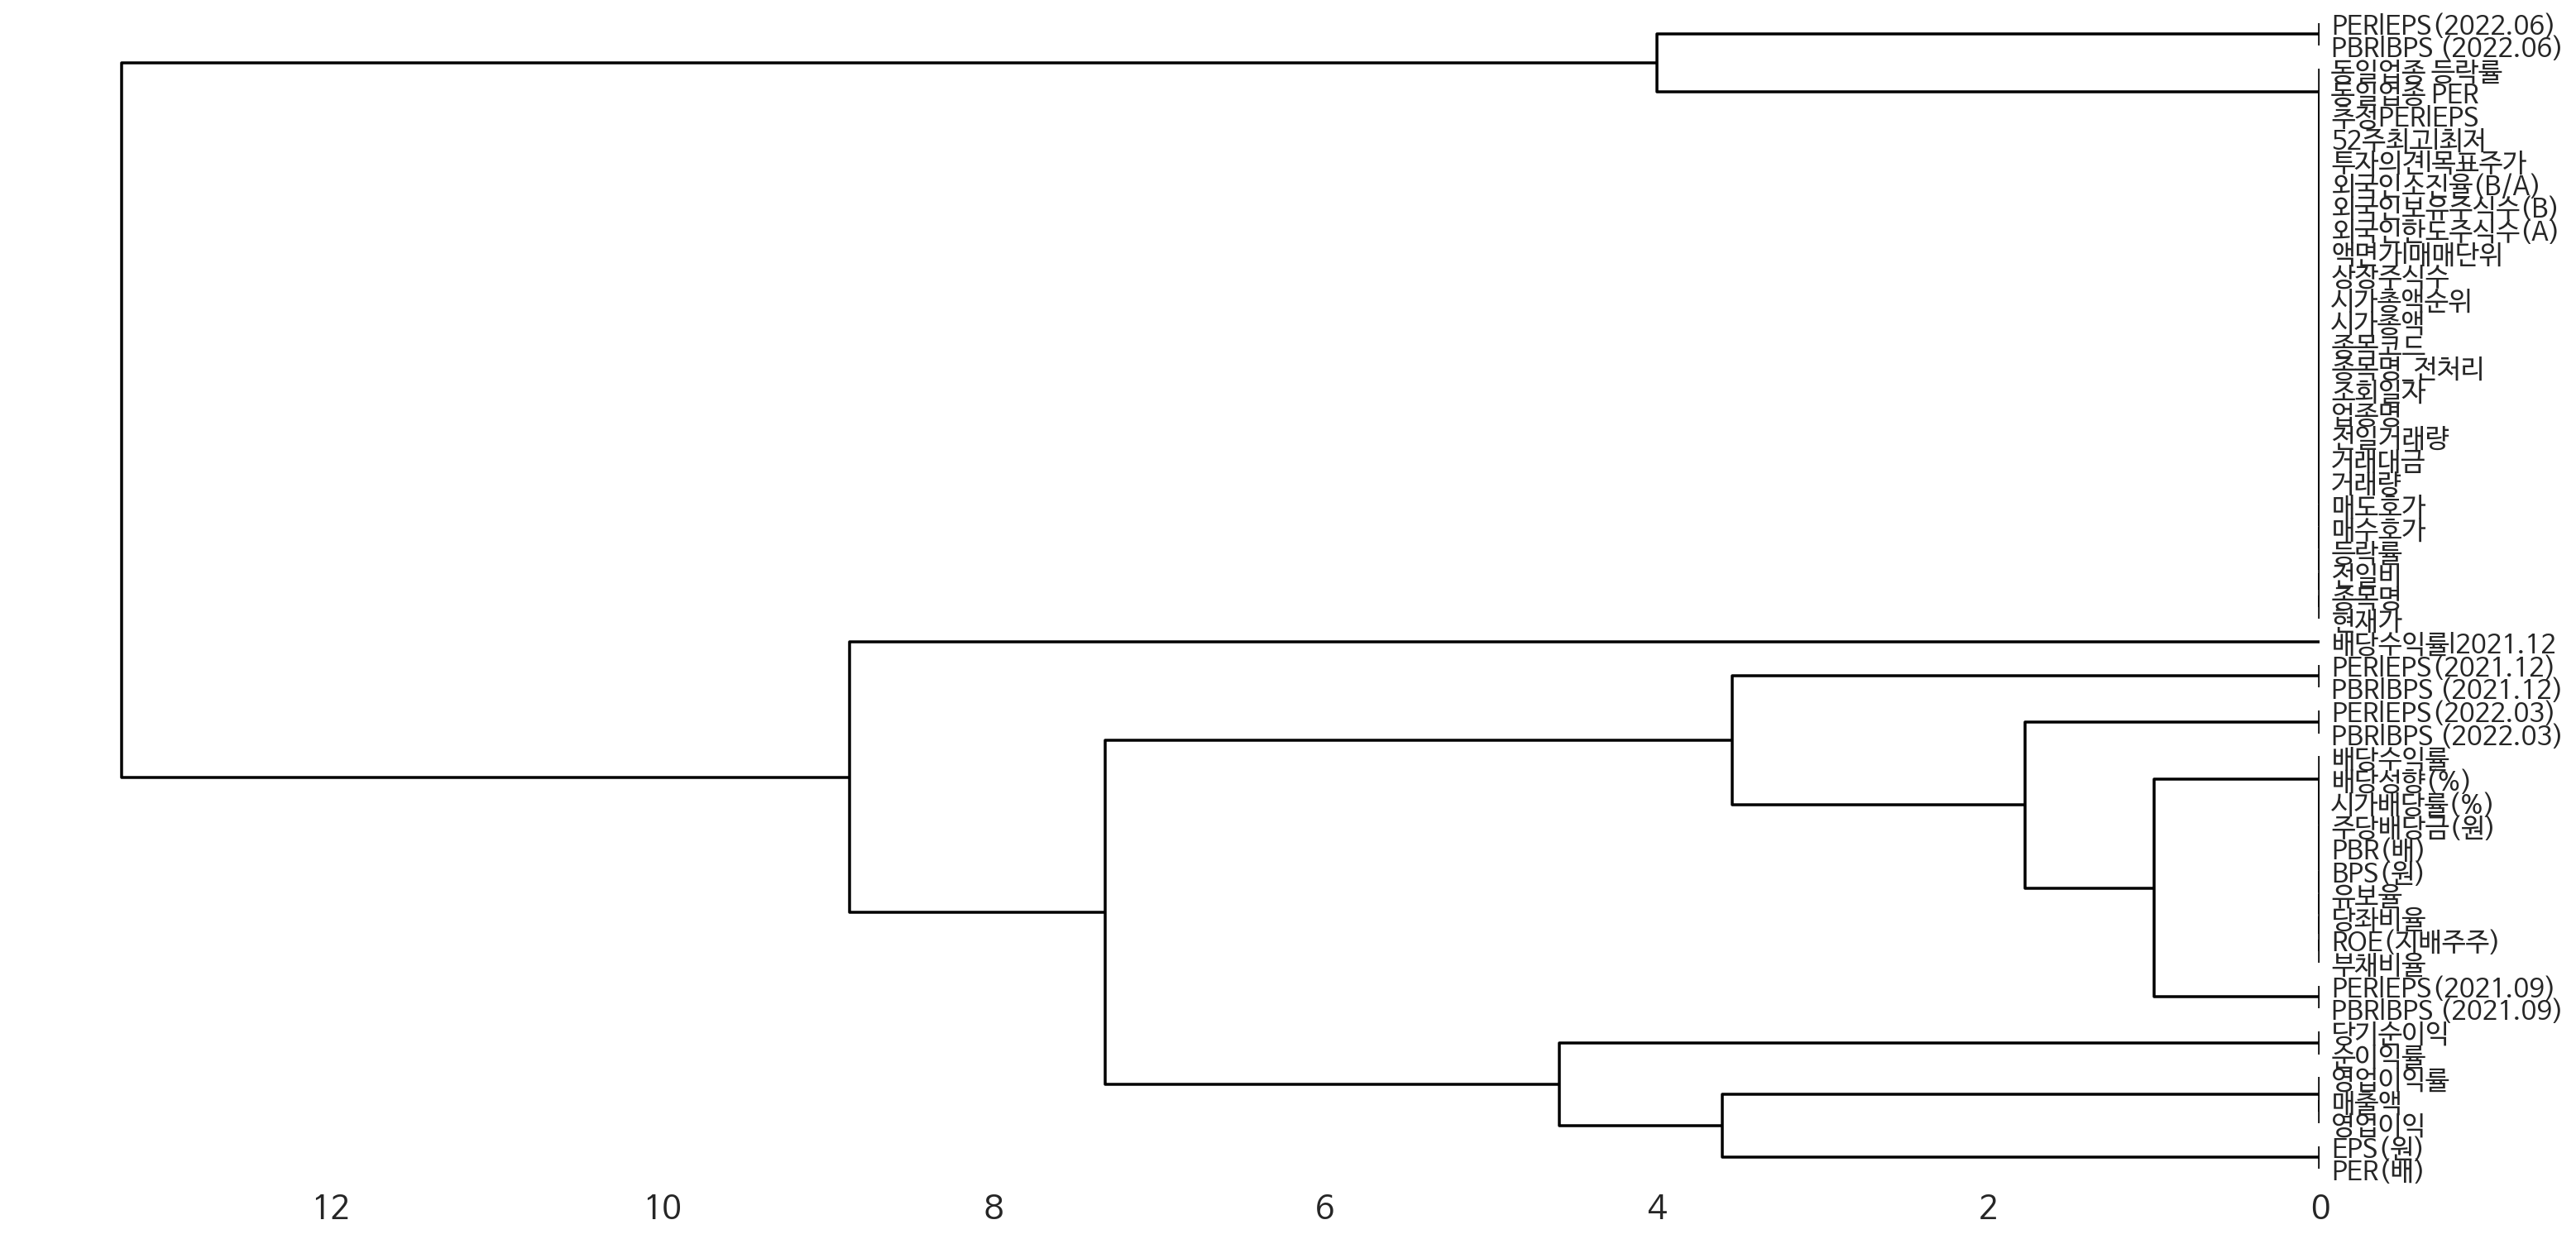

In [15]:
import missingno as msno
msno.dendrogram(raw_data)

In [16]:
# 결측치 제거 전
raw_data.shape

(198, 51)

In [17]:
# 전체가 결측치인 컬럼 삭제
df = raw_data.dropna(axis=1, how="all").copy()
df.shape

(198, 41)

#### 제거 후 결측치 시각화

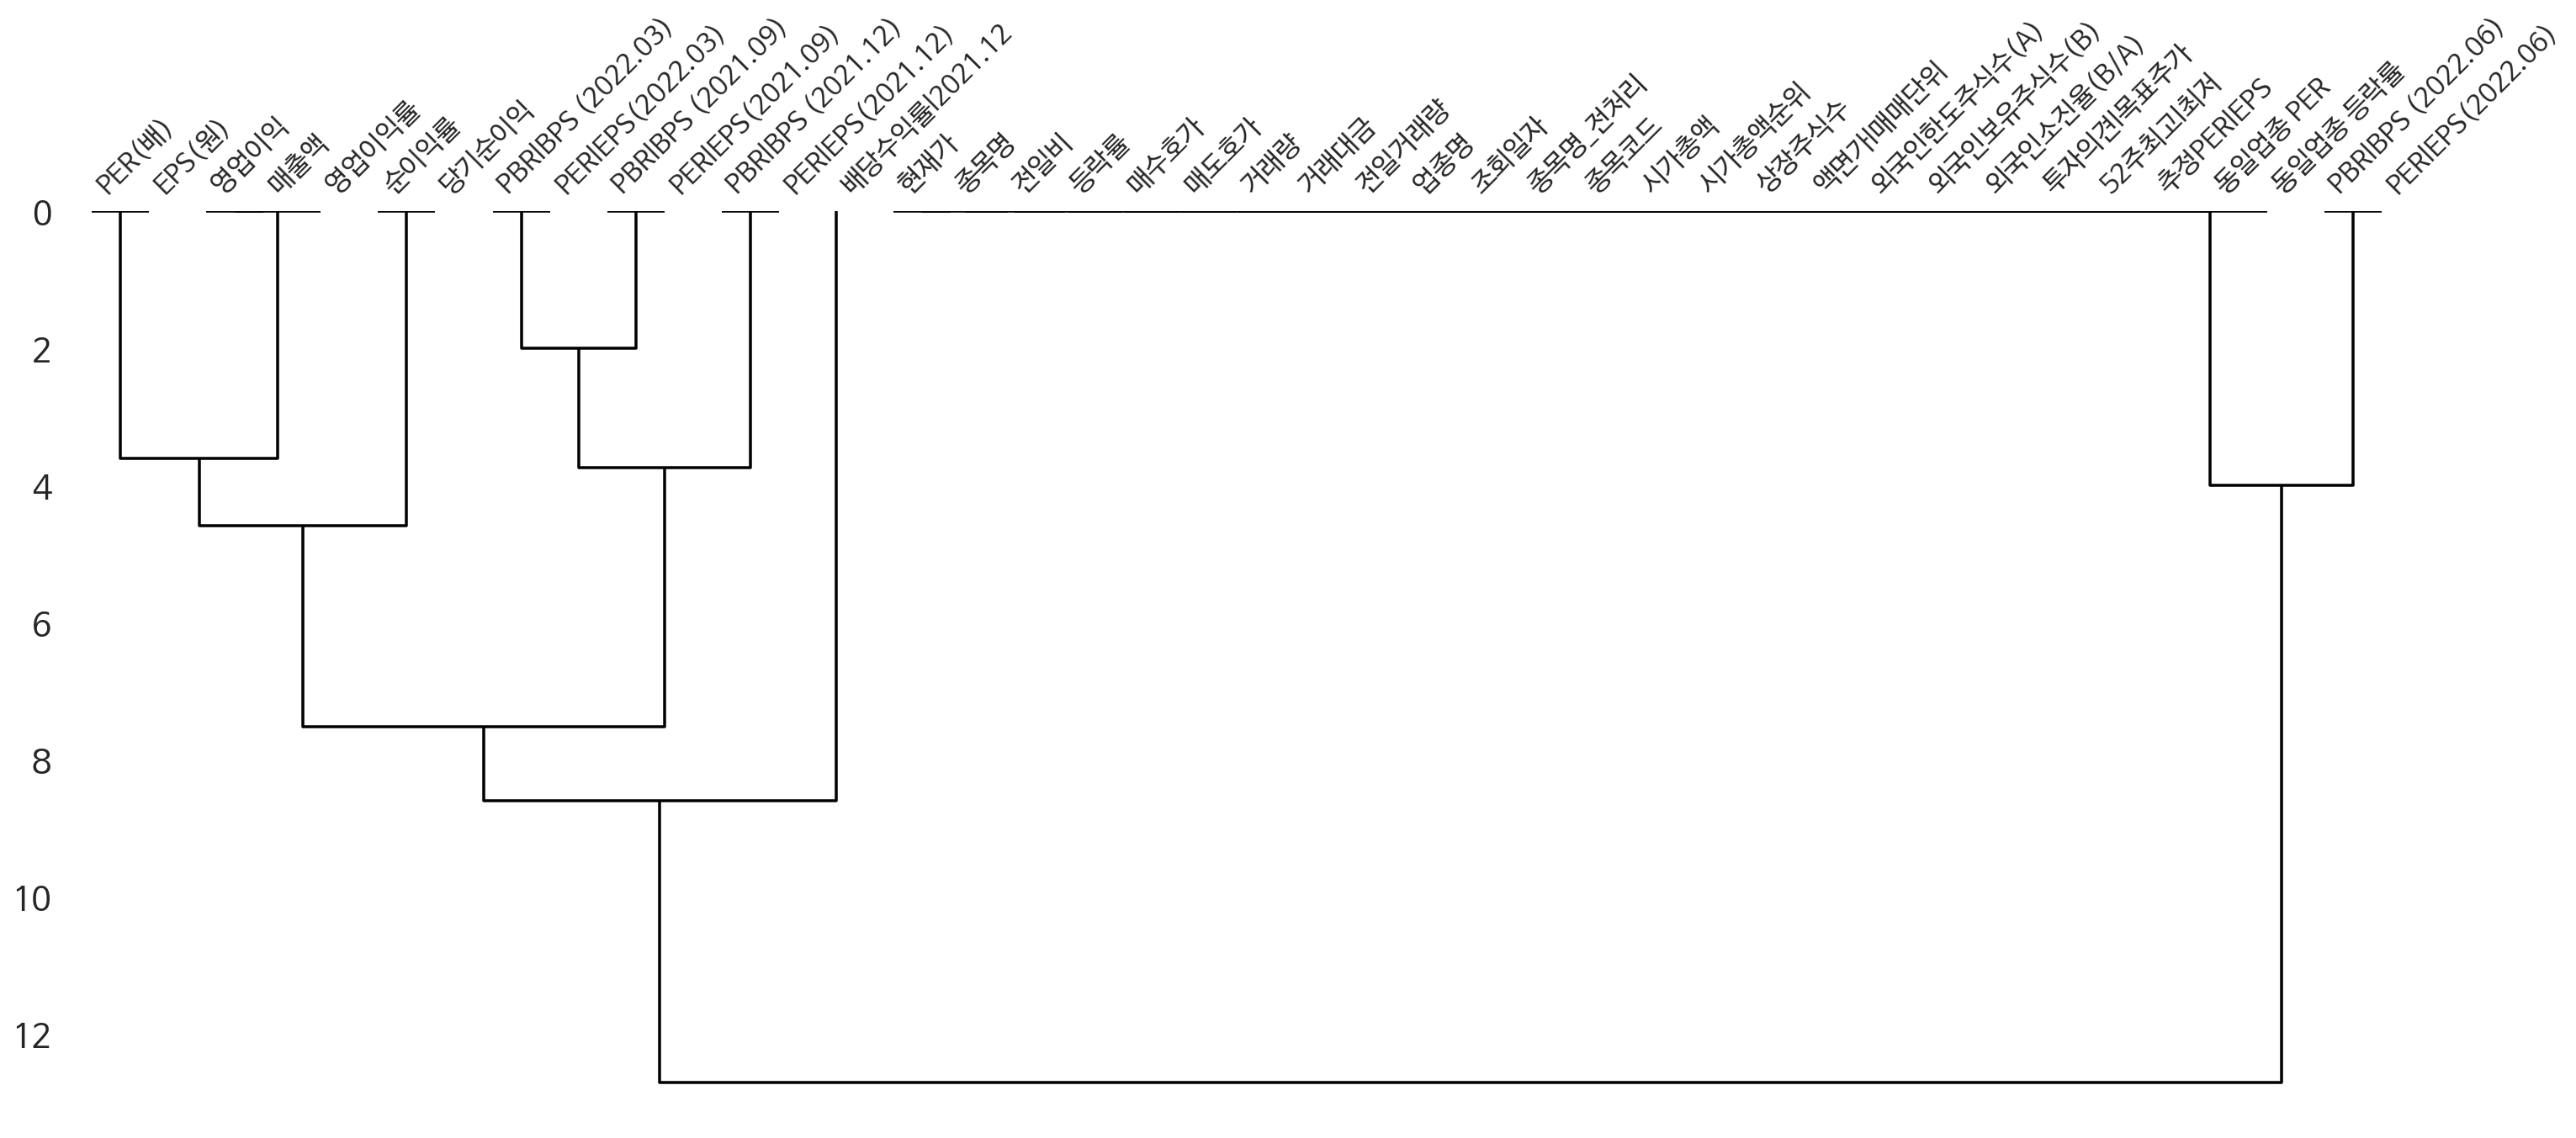

In [19]:
import missingno as msno
msno.dendrogram(df)

In [20]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   종목명                198 non-null    object 
 1   현재가                198 non-null    float64
 2   전일비                198 non-null    float64
 3   등락률                198 non-null    object 
 4   매수호가               198 non-null    float64
 5   매도호가               198 non-null    float64
 6   거래량                198 non-null    float64
 7   거래대금               198 non-null    float64
 8   전일거래량              198 non-null    float64
 9   업종명                198 non-null    object 
 10  조회일자               198 non-null    object 
 11  종목명_전처리            198 non-null    object 
 12  종목코드               198 non-null    object 
 13  매출액                63 non-null     float64
 14  영업이익               63 non-null     float64
 15  당기순이익              39 non-null     float64
 16  영업이익률              63 non-

#### 전처리할 컬럼 
    * 종목명을이용한 코스닥 / 코스피 구분 -> *는 코스닥 종목 
    * 시가총액
    * 시가총액 순위
    * 배당 수익률
    * PER|EPS
    * PBR|BPS

## 파생변수 만들기와 텍스트 데이터 다루기

* 코스피/코스닥 구분 만들기
* 시가총액 순위 분리하기
* 액면가l매매단위
* 52주최고l최저

### 코스피/코스닥 컬럼 만들기

In [21]:
# "코스피/코스닥" 컬럼을 만듭니다.
#  * 는 코스닥 종목입니다. str.endswith 를 사용합니다.
df.loc[df["종목명"].str.endswith("*"), "코스피/코스닥"] = "코스닥"
df.loc[~df["종목명"].str.endswith("*"), "코스피/코스닥"] = "코스피"

In [24]:
# 코스피/코스닥 수 확인
df["코스피/코스닥"].value_counts()

코스닥    162
코스피     36
Name: 코스피/코스닥, dtype: int64

##### 코스피/코스닥 갯수 시각화

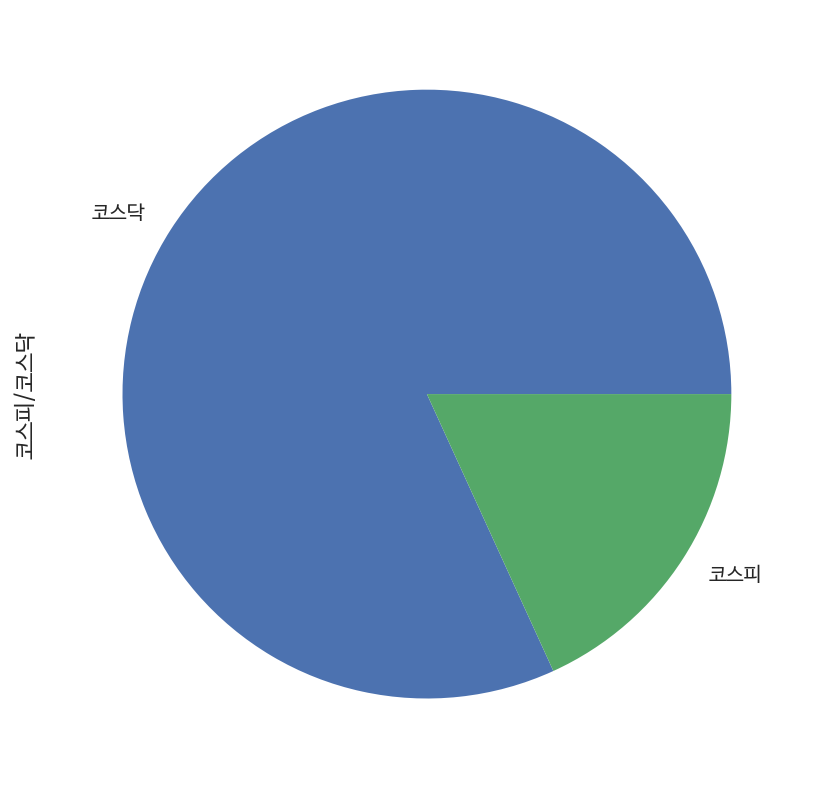

In [23]:
df["코스피/코스닥"].value_counts(normalize=True).plot.pie(figsize=(7,7))

#####  시가총액컬럼 전처리

In [25]:
df['시가총액']

0        922  억원
1        267  억원
2      5,202  억원
3      1,471  억원
4      1,121  억원
         ...    
193    7,436  억원
194    9,679  억원
195      769  억원
196    6,519  억원
197      739  억원
Name: 시가총액, Length: 198, dtype: object

In [26]:
# 정규표현식을 사용한 숫자 추출
df["시가총액(억원)"] = df["시가총액"].str.replace("[^0-9]", "").astype(int)
df["시가총액(억원)"]

0       922
1       267
2      5202
3      1471
4      1121
       ... 
193    7436
194    9679
195     769
196    6519
197     739
Name: 시가총액(억원), Length: 198, dtype: int64

##### 시가총액 순위 전처리

In [27]:
df["시가총액순위"]

0       코스닥 896위
1      코스닥 1492위
2       코스닥 114위
3       코스닥 588위
4       코스닥 764위
         ...    
193     코스피 270위
194      코스닥 50위
195    코스닥 1026위
196     코스피 292위
197    코스닥 1053위
Name: 시가총액순위, Length: 198, dtype: object

In [28]:
# 정규표현식을 사용 숫자를 제외한 문자는 빈문자""로 변경
df["시가총액순위(전처리)"] = df["시가총액순위"].str.replace("[^0-9]", "").astype(int)
df["시가총액순위(전처리)"]

0       896
1      1492
2       114
3       588
4       764
       ... 
193     270
194      50
195    1026
196     292
197    1053
Name: 시가총액순위(전처리), Length: 198, dtype: int64

#####동일업종 PER 컬럼 전처리 후 데이터 타입 변경

In [29]:
df["동일업종 PER"]

0       7.35배
1       7.35배
2       7.35배
3       7.35배
4       7.35배
        ...  
193    31.95배
194    31.95배
195    31.95배
196    31.95배
197    31.95배
Name: 동일업종 PER, Length: 198, dtype: object

In [30]:
# "배" 문자를 제거
df["동일업종 PER"] = df["동일업종 PER"].str.replace("배", "")

In [31]:
# astype(float) 이용하여 수치형으로 변환
df["동일업종 PER"] = df["동일업종 PER"].astype(float)
df["동일업종 PER"]

0       7.35
1       7.35
2       7.35
3       7.35
4       7.35
       ...  
193    31.95
194    31.95
195    31.95
196    31.95
197    31.95
Name: 동일업종 PER, Length: 198, dtype: float64

#### PER와 EPS 전처리
##### filter / melt

##### PER 주가수익비율
* PER = 주식가격 / 주당순이익(EPS)

##### EPS 주당순이익
* EPS =  순이익(당기순이익) / 그 기업이 발행한 총 주식수


#####  특정 텍스트가 들어가는 컬럼 찾기
  * df.filter(regex=) 사용

In [32]:
df.head(3)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,배당수익률l2021.12,PERlEPS(2021.12),PBRlBPS (2021.12),PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09),코스피/코스닥,시가총액(억원),시가총액순위(전처리)
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스닥,922,896
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스닥,267,1492
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,...,0.41%,NaN,NaN,NaN,NaN,NaN,NaN,코스닥,5202,114


In [34]:
# "PERlEPS" 가 들어가는 컬럼만 추출
# 종목코드 컬럼 추가
per_eps = df.filter(regex="^PERlEPS").copy()
per_eps["종목코드"] = df["종목코드"]
per_eps.head()

,PERlEPS(2022.06),PERlEPS(2021.12),PERlEPS(2022.03),PERlEPS(2021.09),종목코드
0,N/A l -133원,NaN,NaN,NaN,073570
1,N/A l -272원,NaN,NaN,NaN,224060
2,43.62배 l 556원,NaN,NaN,NaN,101490
3,"21.22배 l 1,098원",NaN,NaN,NaN,219130
4,34.53배 l 333원,NaN,NaN,NaN,059120


### melt로 종목코드 tidy data만들기

In [35]:
per_eps_melt = per_eps.melt(id_vars="종목코드")
per_eps_melt

,종목코드,variable,value
0,073570,PERlEPS(2022.06),N/A l -133원
1,224060,PERlEPS(2022.06),N/A l -272원
2,101490,PERlEPS(2022.06),43.62배 l 556원
3,219130,PERlEPS(2022.06),"21.22배 l 1,098원"
4,059120,PERlEPS(2022.06),34.53배 l 333원
...,...,...,...
787,363280,PERlEPS(2021.09),NaN
788,122870,PERlEPS(2021.09),NaN
789,322780,PERlEPS(2021.09),NaN
790,036420,PERlEPS(2021.09),NaN


In [36]:
# 종목코드별 PERlEPS 행 갯수확인
per_eps_melt["종목코드"].value_counts()

073570    4
024850    4
000990    4
000660    4
171010    4
         ..
045300    4
006200    4
042700    4
241790    4
204630    4
Name: 종목코드, Length: 198, dtype: int64

##### 결측치 데이터 제거

In [37]:
# PERlEPS 데이터프레임에서 결측치 데이터 제거
# 여기에서 기간별로 생긴 행은 이전 실습에서 concat으로 데이터를 합칠 때 
# 컬럼의 이름이 다르면 새로운 컬럼으로 생성하기 때문입니다.
df_per_eps = per_eps_melt.dropna()
df_per_eps

,종목코드,variable,value
0,073570,PERlEPS(2022.06),N/A l -133원
1,224060,PERlEPS(2022.06),N/A l -272원
2,101490,PERlEPS(2022.06),43.62배 l 556원
3,219130,PERlEPS(2022.06),"21.22배 l 1,098원"
4,059120,PERlEPS(2022.06),34.53배 l 333원
...,...,...,...
377,389140,PERlEPS(2021.12),27.47배 l 577원
489,222160,PERlEPS(2022.03),106.90배 l 58원
527,227950,PERlEPS(2022.03),N/A l -392원
576,131100,PERlEPS(2022.03),"N/A l -1,245원"


In [38]:
# rename을 통해 variable 컬럼명 "PERlEPS"로 변경
df_per_eps = df_per_eps.rename(columns={"variable": "PERlEPS"})
df_per_eps

,종목코드,PERlEPS,value
0,073570,PERlEPS(2022.06),N/A l -133원
1,224060,PERlEPS(2022.06),N/A l -272원
2,101490,PERlEPS(2022.06),43.62배 l 556원
3,219130,PERlEPS(2022.06),"21.22배 l 1,098원"
4,059120,PERlEPS(2022.06),34.53배 l 333원
...,...,...,...
377,389140,PERlEPS(2021.12),27.47배 l 577원
489,222160,PERlEPS(2022.03),106.90배 l 58원
527,227950,PERlEPS(2022.03),N/A l -392원
576,131100,PERlEPS(2022.03),"N/A l -1,245원"


In [39]:
# df_per_eps에  PER, EPS 컬럼 분리하여 생성
df_per_eps["PER"] = df_per_eps["value"].str.split("  l  ", expand=True)[0]
df_per_eps["EPS"] = df_per_eps["value"].str.split("  l  ", expand=True)[1]

In [40]:
# N/A 값을 결측치로 전환
df_per_eps["PER"] = df_per_eps["PER"].replace("N/A", np.nan)
df_per_eps["EPS"] = df_per_eps["EPS"].replace("N/A", np.nan)

In [ ]:
#  PER, EPS 값 중 둘 다 결측치는 notnull 혹은 isnull을 사용해 제거
df_per_eps = df_per_eps[df_per_eps["PER"].notnull() | df_per_eps["EPS"].notnull()].copy()

In [41]:
# PER(배) 컬럼을 만들고 수치데이터로 변환
df_per_eps["PER(배)"] = df_per_eps["PER"].str.replace("[^0-9.]", "").astype(float)

In [42]:
# EPS(원) 컬럼을 만들고 수치데이터로 변환
df_per_eps["EPS(원)"] = df_per_eps["EPS"].str.replace("원|,", "").astype(int)

In [68]:
# 필요한 컬럼만 따로 가져옵니다.
df_per_eps = df_per_eps[["종목코드", "PERlEPS", "PER(배)", "EPS(원)"]].copy()
df_per_eps.head()

,종목코드,PERlEPS,PER(배),EPS(원)
0,073570,PERlEPS(2022.06),NaN,-133
1,224060,PERlEPS(2022.06),NaN,-272
2,101490,PERlEPS(2022.06),43.62,556
3,219130,PERlEPS(2022.06),21.22,1098
4,059120,PERlEPS(2022.06),34.53,333


##### 중복 데이터 확인

In [45]:
# 종목코드기준 중복된 데이터 확인
df_per_eps[df_per_eps.duplicated("종목코드")]

,종목코드,PERlEPS,PER(배),EPS(원)


### PBRlBPS 전처리


#### PBR(주가순자산비율, price-to-book ratio, P/B ratio)

* PBR = 주가/BPS(주당순자산가치)
#### BPS(주당순자산가치, Book-value Per Share)

* 주당순자산가치 = 기업의 순자산/ 발행 주식수


In [47]:
# "PBRlBPS" 가 들어가는 컬럼만 추출
# 종목코드 컬럼 추가
pbr_bps = df.filter(regex="PBRlBPS").copy()
pbr_bps["종목코드"] = df["종목코드"]
pbr_bps

,PBRlBPS (2022.06),PBRlBPS (2021.12),PBRlBPS (2022.03),PBRlBPS (2021.09),종목코드
0,3.10배 l 368원,NaN,NaN,NaN,073570
1,"0.43배 l 1,026원",NaN,NaN,NaN,224060
2,"2.81배 l 8,623원",NaN,NaN,NaN,101490
3,"2.62배 l 8,879원",NaN,NaN,NaN,219130
4,"2.38배 l 4,839원",NaN,NaN,NaN,059120
...,...,...,...,...,...
193,"0.37배 l 39,323원",NaN,NaN,NaN,363280
194,"2.50배 l 20,751원",NaN,NaN,NaN,122870
195,"1.56배 l 1,376원",NaN,NaN,NaN,322780
196,"3.86배 l 8,808원",NaN,NaN,NaN,036420


In [48]:
# 종목코드 tidy data 생성.
pbr_bps_melt = pbr_bps.melt(id_vars="종목코드").copy()
pbr_bps_melt

,종목코드,variable,value
0,073570,PBRlBPS (2022.06),3.10배 l 368원
1,224060,PBRlBPS (2022.06),"0.43배 l 1,026원"
2,101490,PBRlBPS (2022.06),"2.81배 l 8,623원"
3,219130,PBRlBPS (2022.06),"2.62배 l 8,879원"
4,059120,PBRlBPS (2022.06),"2.38배 l 4,839원"
...,...,...,...
787,363280,PBRlBPS (2021.09),NaN
788,122870,PBRlBPS (2021.09),NaN
789,322780,PBRlBPS (2021.09),NaN
790,036420,PBRlBPS (2021.09),NaN


In [49]:
# 결측치를 제거합니다.
df_pbr_bps = pbr_bps_melt.dropna()
df_pbr_bps

,종목코드,variable,value
0,073570,PBRlBPS (2022.06),3.10배 l 368원
1,224060,PBRlBPS (2022.06),"0.43배 l 1,026원"
2,101490,PBRlBPS (2022.06),"2.81배 l 8,623원"
3,219130,PBRlBPS (2022.06),"2.62배 l 8,879원"
4,059120,PBRlBPS (2022.06),"2.38배 l 4,839원"
...,...,...,...
377,389140,PBRlBPS (2021.12),"2.45배 l 6,466원"
489,222160,PBRlBPS (2022.03),"2.04배 l 3,041원"
527,227950,PBRlBPS (2022.03),1.07배 l 952원
576,131100,PBRlBPS (2022.03),"1.08배 l 2,877원"


In [69]:
# variable 컬럼명 "PBRlBPS"로 변경
df_pbr_bps = df_pbr_bps.rename(columns={"variable":"PBRlBPS"})
df_pbr_bps.head()

,종목코드,PBRlBPS,PBR(배),BPS(원)
0,073570,PBRlBPS (2022.06),3.10,368.0
1,224060,PBRlBPS (2022.06),0.43,1026.0
2,101490,PBRlBPS (2022.06),2.81,8623.0
3,219130,PBRlBPS (2022.06),2.62,8879.0
4,059120,PBRlBPS (2022.06),2.38,4839.0


In [52]:
# PBR, BPS 컬럼생성
df_pbr_bps["PBR"] = df_pbr_bps["value"].str.split("  l  ", expand=True)[0]
df_pbr_bps["BPS"] = df_pbr_bps["value"].str.split("  l  ", expand=True)[1]

In [53]:
# N/A 값  결측치로 변환
df_pbr_bps["PBR"] = df_pbr_bps["PBR"].replace("N/A", np.nan)
df_pbr_bps["BPS"] = df_pbr_bps["BPS"].replace("N/A", np.nan)

In [54]:
# 전처리 후 형변환
df_pbr_bps["PBR(배)"] = df_pbr_bps["PBR"].str.replace("배", "").astype(float)
df_pbr_bps["BPS(원)"] = df_pbr_bps["BPS"].str.replace("원|,", "").astype(float)

In [55]:
# 중복값 확인
df_pbr_bps[df_pbr_bps.duplicated(["종목코드"])]

,종목코드,PBRlBPS,value,PBR,BPS,PBR(배),BPS(원)


In [70]:
df_pbr_bps = df_pbr_bps[["종목코드", "PBRlBPS", "PBR(배)", "BPS(원)"]].copy()
df_pbr_bps.head()

,종목코드,PBRlBPS,PBR(배),BPS(원)
0,073570,PBRlBPS (2022.06),3.10,368.0
1,224060,PBRlBPS (2022.06),0.43,1026.0
2,101490,PBRlBPS (2022.06),2.81,8623.0
3,219130,PBRlBPS (2022.06),2.62,8879.0
4,059120,PBRlBPS (2022.06),2.38,4839.0


### 배당 수익률 전처리

In [59]:
#배당수익률이 들어가는 컬럼만 찾고 종목코드 추가
dividend = df.filter(regex="배당수익률").copy()

In [71]:
# 추후 병합을 위해 데이터프레임에 종목코드를 추가합니다.
dividend["종목코드"] = df["종목코드"]
dividend.head()

,배당수익률l2021.12,종목코드
0,NaN,073570
1,NaN,224060
2,0.41%,101490
3,NaN,219130
4,1.30%,059120


In [72]:
# melt 로 종목코드 tidydata생성 후 결측치 제거
df_dividend = dividend.melt(id_vars="종목코드").copy()
df_dividend = df_dividend.dropna()
df_dividend.head()

,종목코드,variable,value
2,101490,배당수익률l2021.12,0.41%
4,059120,배당수익률l2021.12,1.30%
7,217500,배당수익률l2021.12,0.83%
8,311320,배당수익률l2021.12,0.46%
9,183300,배당수익률l2021.12,1.05%


In [73]:
# "종목코드", "배당수익률기간", "배당수익률" 컬럼명 변경
df_dividend.columns = ["종목코드", "배당수익률기간", "배당수익률"]
df_dividend.head()

,종목코드,배당수익률기간,배당수익률
2,101490,배당수익률l2021.12,0.41%
4,059120,배당수익률l2021.12,1.30%
7,217500,배당수익률l2021.12,0.83%
8,311320,배당수익률l2021.12,0.46%
9,183300,배당수익률l2021.12,1.05%


In [63]:
# 전처리 컬럼생성
df_dividend["배당수익률%"] = df_dividend["배당수익률"].str.replace("%", "").astype(float)

In [64]:
# 종목코드 중복확인
df_dividend["종목코드"].value_counts().unique()

array([1])

In [65]:
# 전처리가 끝난 배당수익률 컬럼은 제거합니다.
del df_dividend["배당수익률"]

In [66]:
df_dividend.head()

,종목코드,배당수익률기간,배당수익률%
2,101490,배당수익률l2021.12,0.41
4,059120,배당수익률l2021.12,1.30
7,217500,배당수익률l2021.12,0.83
8,311320,배당수익률l2021.12,0.46
9,183300,배당수익률l2021.12,1.05


#### merge 로 기존 데이터와 병합하기


In [67]:
df.shape

(198, 44)

In [74]:
# df와 df_per_eps 병합
df_merge_per = df.merge(df_per_eps, left_on="종목코드", right_on="종목코드", how="left")
df_merge_per.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09),코스피/코스닥,시가총액(억원),시가총액순위(전처리),PERlEPS,PER(배)_y,EPS(원)_y
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,NaN,NaN,NaN,NaN,코스닥,922,896,PERlEPS(2022.06),NaN,-133


In [75]:
df_merge_per.shape

(198, 47)

In [76]:
# 위에서 병합한 데이터(df_merge_per)에 df_pbr_bps 병합
df_merge_pbr = df_merge_per.merge(df_pbr_bps, on="종목코드", how="left")
df_merge_pbr.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,PBRlBPS (2021.09),코스피/코스닥,시가총액(억원),시가총액순위(전처리),PERlEPS,PER(배)_y,EPS(원)_y,PBRlBPS,PBR(배),BPS(원)
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,NaN,코스닥,922,896,PERlEPS(2022.06),NaN,-133,PBRlBPS (2022.06),3.1,368.0


In [77]:
df_merge_pbr.shape

(198, 50)

In [78]:
# 위에서 병합한 데이터(df_merge_pb)에 df_dividend 병합
# df_final 이라는 변수에 담습니다.
df_final = df_merge_pbr.merge(df_dividend, how="left")

In [79]:
df_final.shape

(198, 52)

In [80]:
df_final.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,시가총액(억원),시가총액순위(전처리),PERlEPS,PER(배)_y,EPS(원)_y,PBRlBPS,PBR(배),BPS(원),배당수익률기간,배당수익률
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,922,896,PERlEPS(2022.06),NaN,-133,PBRlBPS (2022.06),3.1,368.0,NaN,NaN


#### 사용하지 않는 컬럼 제거

In [81]:
# l 구분자가 들어가는 컬럼명추출
del_cols = df_final.filter(regex="l").columns
del_cols

Index(['액면가l매매단위', '투자의견l목표주가', '52주최고l최저', 'PERlEPS(2022.06)', '추정PERlEPS',
       'PBRlBPS (2022.06)', '배당수익률l2021.12', 'PERlEPS(2021.12)',
       'PBRlBPS (2021.12)', 'PERlEPS(2022.03)', 'PBRlBPS (2022.03)',
       'PERlEPS(2021.09)', 'PBRlBPS (2021.09)', 'PERlEPS', 'PBRlBPS'],
      dtype='object')

In [82]:
# 위 컬럼명 삭제
df_final = df_final.drop(del_cols, axis=1).copy()

In [83]:
df_final.shape

(198, 37)

In [86]:
# 전처리 원본 컬럼 및 사용하지않는 컬럼 제거
del_cols2 = ['종목명_전처리', '시가총액', '시가총액순위', '배당수익률기간']

In [87]:
# del_cols2 를 제거합니다.
df_final = df_final.drop(del_cols2, axis=1)

In [88]:
# 컬럼명 중 필요없는 컬럼이 없는지 확인합니다.
df_final.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '업종명', '조회일자', '종목코드', '매출액', '영업이익', '당기순이익', '영업이익률', '순이익률',
       'EPS(원)_x', 'PER(배)_x', '상장주식수', '외국인한도주식수(A)', '외국인보유주식수(B)',
       '외국인소진율(B/A)', '동일업종 PER', '동일업종 등락률', '코스피/코스닥', '시가총액(억원)',
       '시가총액순위(전처리)', 'PER(배)_y', 'EPS(원)_y', 'PBR(배)', 'BPS(원)', '배당수익률'],
      dtype='object')

In [89]:
df_final.shape

(198, 33)

#### 파일 저장

In [91]:
# 기존 파일명에 _ver2 추가하여 저장
file_name2 = file_name.replace(".csv", "_ver2.csv")
file_name2

'/content/drive/MyDrive/Colab Notebooks/2022-09-20_ver2.csv'

In [92]:
df_final.to_csv(file_name2, index=False)

In [93]:
# 파일확인
pd.read_csv(file_name2, dtype={"종목코드":np.object})

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,동일업종 PER,동일업종 등락률,코스피/코스닥,시가총액(억원),시가총액순위(전처리),PER(배)_y,EPS(원)_y,PBR(배),BPS(원),배당수익률
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,7.35,-1.10%,코스닥,922,896,NaN,-133,3.10,368.0,NaN
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,...,7.35,-1.10%,코스닥,267,1492,NaN,-272,0.43,1026.0,NaN
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,...,7.35,-1.10%,코스닥,5202,114,43.62,556,2.81,8623.0,0.41%
3,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비,...,7.35,-1.10%,코스닥,1471,588,21.22,1098,2.62,8879.0,NaN
4,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비,...,7.35,-1.10%,코스닥,1121,764,34.53,333,2.38,4839.0,1.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,티와이홀딩스,14600.0,100.0,-0.68%,14550.0,14600.0,31751.0,462.0,63460.0,방송과엔터테인먼트,...,31.95,+1.39%,코스피,7436,270,5.93,2461,0.37,39323.0,NaN
194,와이지엔터테인먼트 *,51900.0,600.0,-1.14%,51900.0,52000.0,299066.0,15631.0,395513.0,방송과엔터테인먼트,...,31.95,+1.39%,코스닥,9679,50,114.07,455,2.50,20751.0,0.48%
195,코퍼스코리아 *,2150.0,30.0,-1.38%,2150.0,2170.0,175773.0,382.0,74907.0,방송과엔터테인먼트,...,31.95,+1.39%,코스닥,769,1026,16.41,131,1.56,1376.0,0.70%
196,콘텐트리중앙,34000.0,650.0,-1.88%,34000.0,34100.0,142798.0,4891.0,174374.0,방송과엔터테인먼트,...,31.95,+1.39%,코스피,6519,292,NaN,-1856,3.86,8808.0,NaN
